## 实现梯度下降

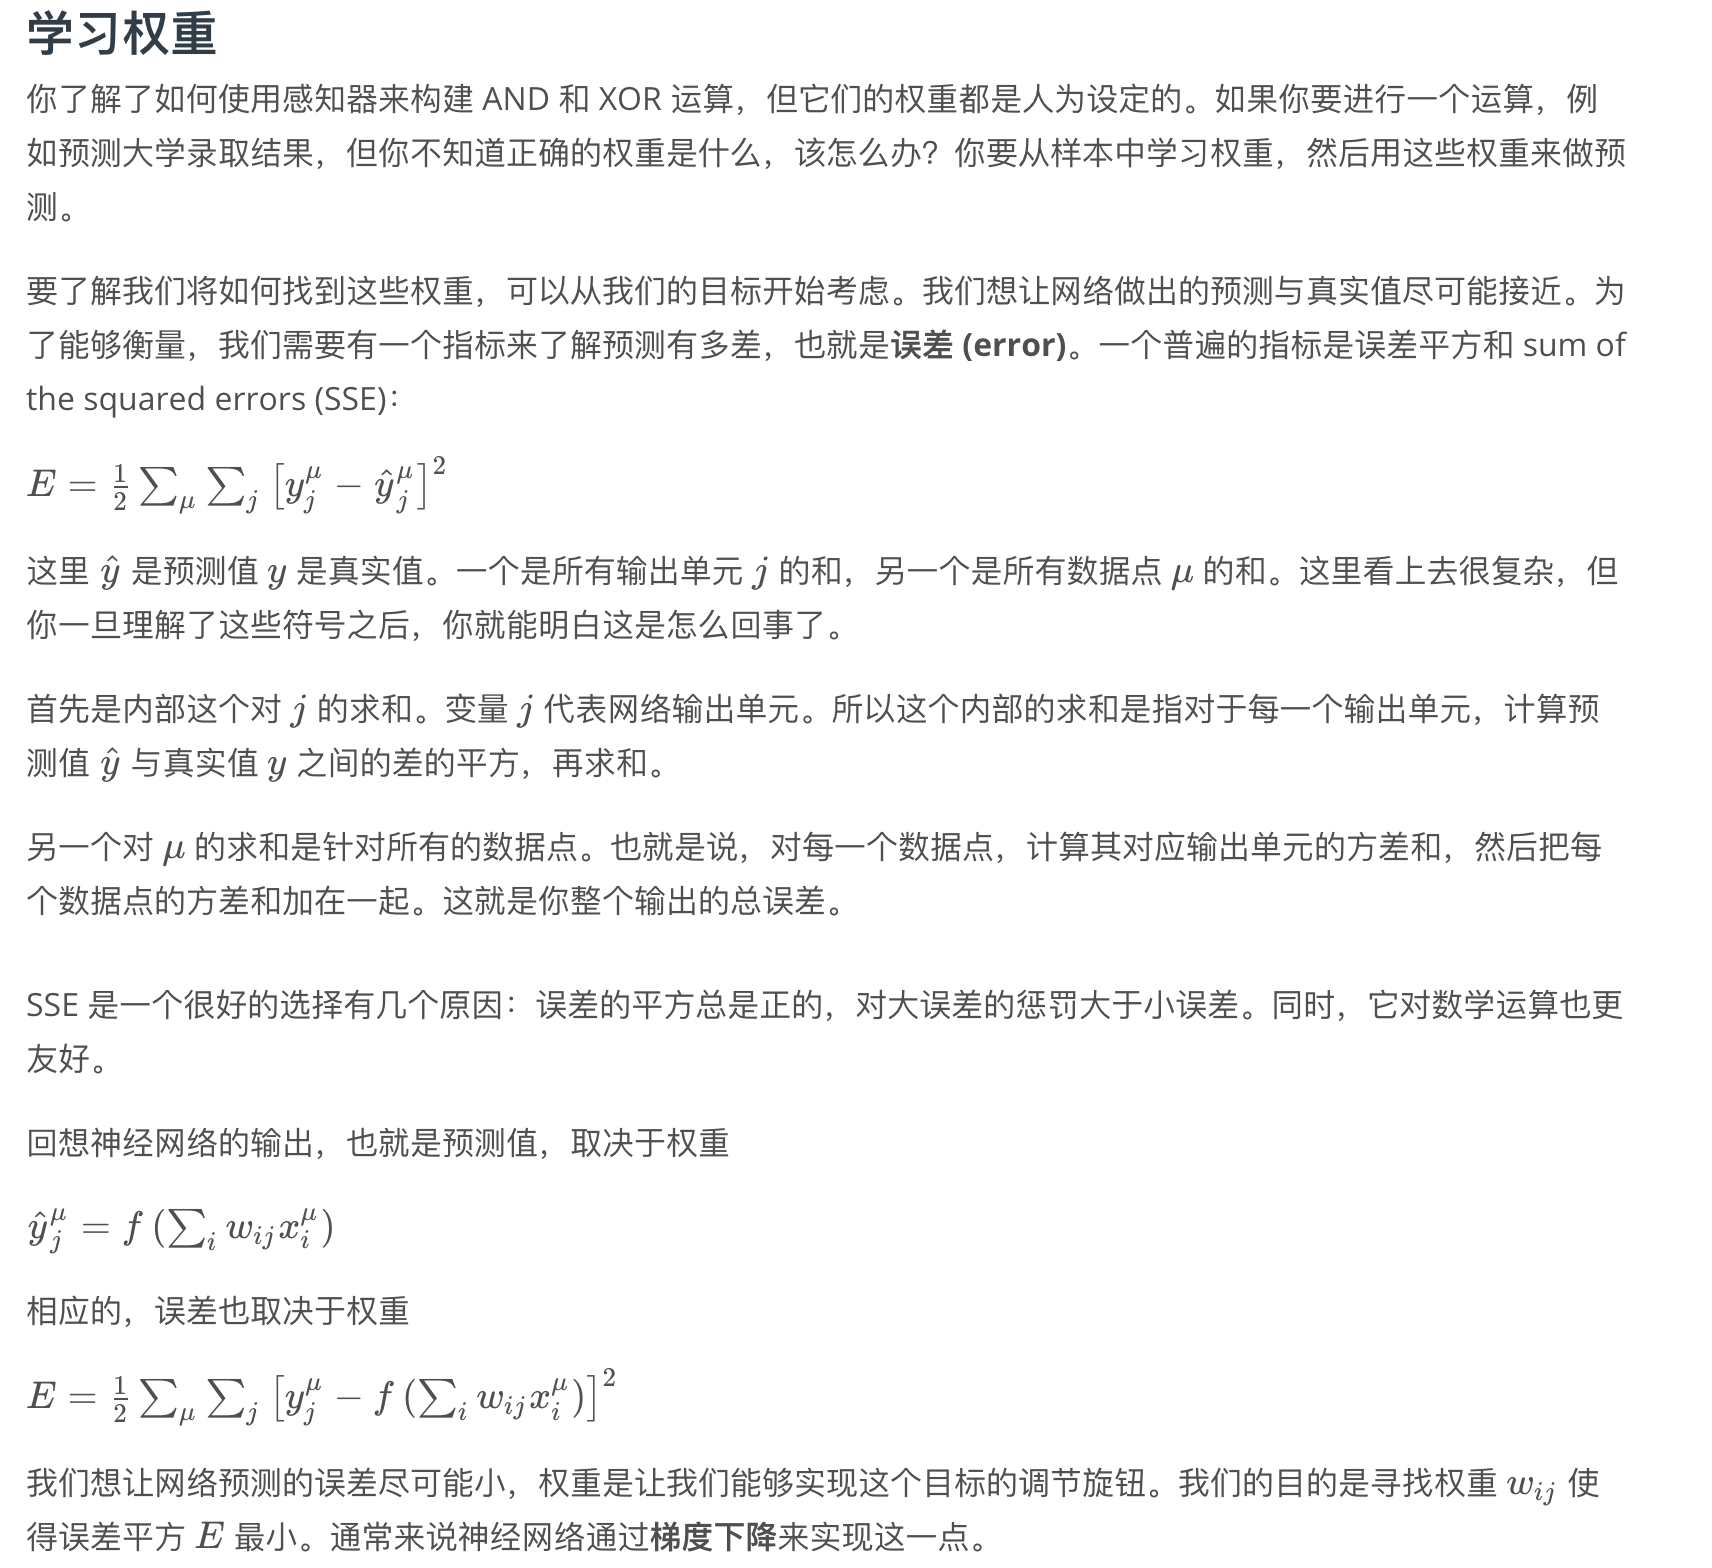

## 如何避免梯度下降，陷入局部最小值？
见印象笔记

## 梯度下降：代码

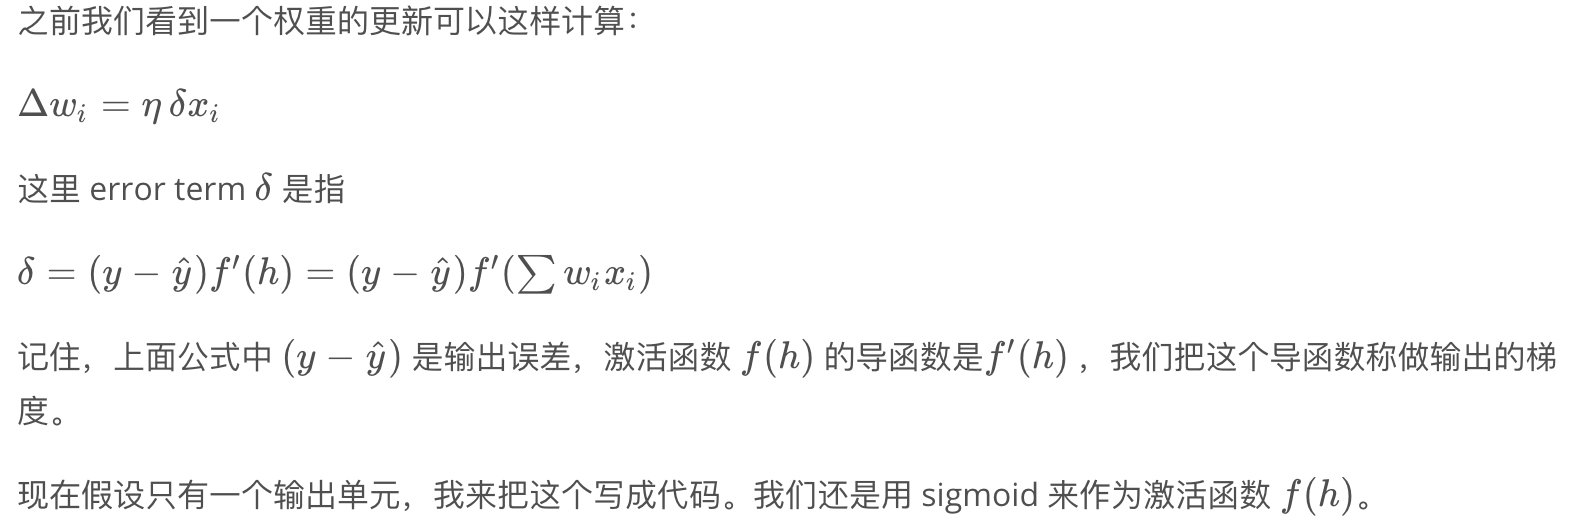

In [2]:
import numpy as np

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1/(1+np.exp(-x))

def sigmoid_prime(x):
    """
    # Derivative of the sigmoid function
    """
    return sigmoid(x) * (1 - sigmoid(x))

learnrate = 0.5
x = np.array([1, 2, 3, 4])
y = np.array(0.5)

# Initial weights
w = np.array([0.5, -0.5, 0.3, 0.1])

### Calculate one gradient descent step for each weight
### Note: Some steps have been consilated, so there are
###       fewer variable names than in the above sample code

# TODO: Calculate the node's linear combination of inputs and weights
h = np.dot(x,w)

# TODO: Calculate output of neural network
nn_output = sigmoid(h)

# TODO: Calculate error of neural network
error = y - nn_output

# TODO: Calculate the error term
#       Remember, this requires the output gradient, which we haven't
#       specifically added a variable for.
error_term = error * sigmoid_prime(h)

# TODO: Calculate change in weights
del_w = learnrate * error_term *x

print('Neural Network output:')
print(nn_output)
print('Amount of Error:')
print(error)
print('Change in Weights:')
print(del_w)

Neural Network output:
0.6899744811276125
Amount of Error:
-0.1899744811276125
Change in Weights:
[-0.02031869 -0.04063738 -0.06095608 -0.08127477]


## 实现梯度下降
https://classroom.udacity.com/nanodegrees/nd101-cn/parts/e7f2a11a-4da3-4deb-8d5c-635907a09460/modules/b710d7cd-83a7-48c5-8b43-63beebd97369/lessons/0e07fafa-e796-4fab-b119-13f47f1d5c1b/concepts/4b167ce0-9d45-45e1-bfe6-891b2c68ac94

### 算法概述：
- 权重步长设定为0：$\Delta{w_i}=0$
- 对训练数据中的每一条记录：
    - 通过网络做正向传播，计算输出$\hat{y} = f(\sum_i{w_ix_i})$
    - 计算输出单元的误差项(error term) $\delta = (y - \hat{y}) * f^{'}(\sum_i{w_ix_i})$
    - 更新权重步长$\Delta{w_i} = \Delta{w_i} + \delta{x_i}$
- 更新权重$w_i = w_i + \eta\Delta{w_i}/m$ .其中$\eta$是学习率，m是数据点个数。这里我们队权重步长做了平均，为的是降低训练数据中大的变化。
- 重复$e$(epoch).

你也可以对每条数据更新权重，迩不是吧所有记录都训练过之后再取平均。
这里我们还是sigmoid作为激活函数：
$$f(h) = 1/ (1 + e^{-h})$$

sigmoid的梯度是：$f^{'}(h) = f(h)(1-f(h))$
其中h是输出单元的输入：
$$h = \sum_i{w_ix_i}$$


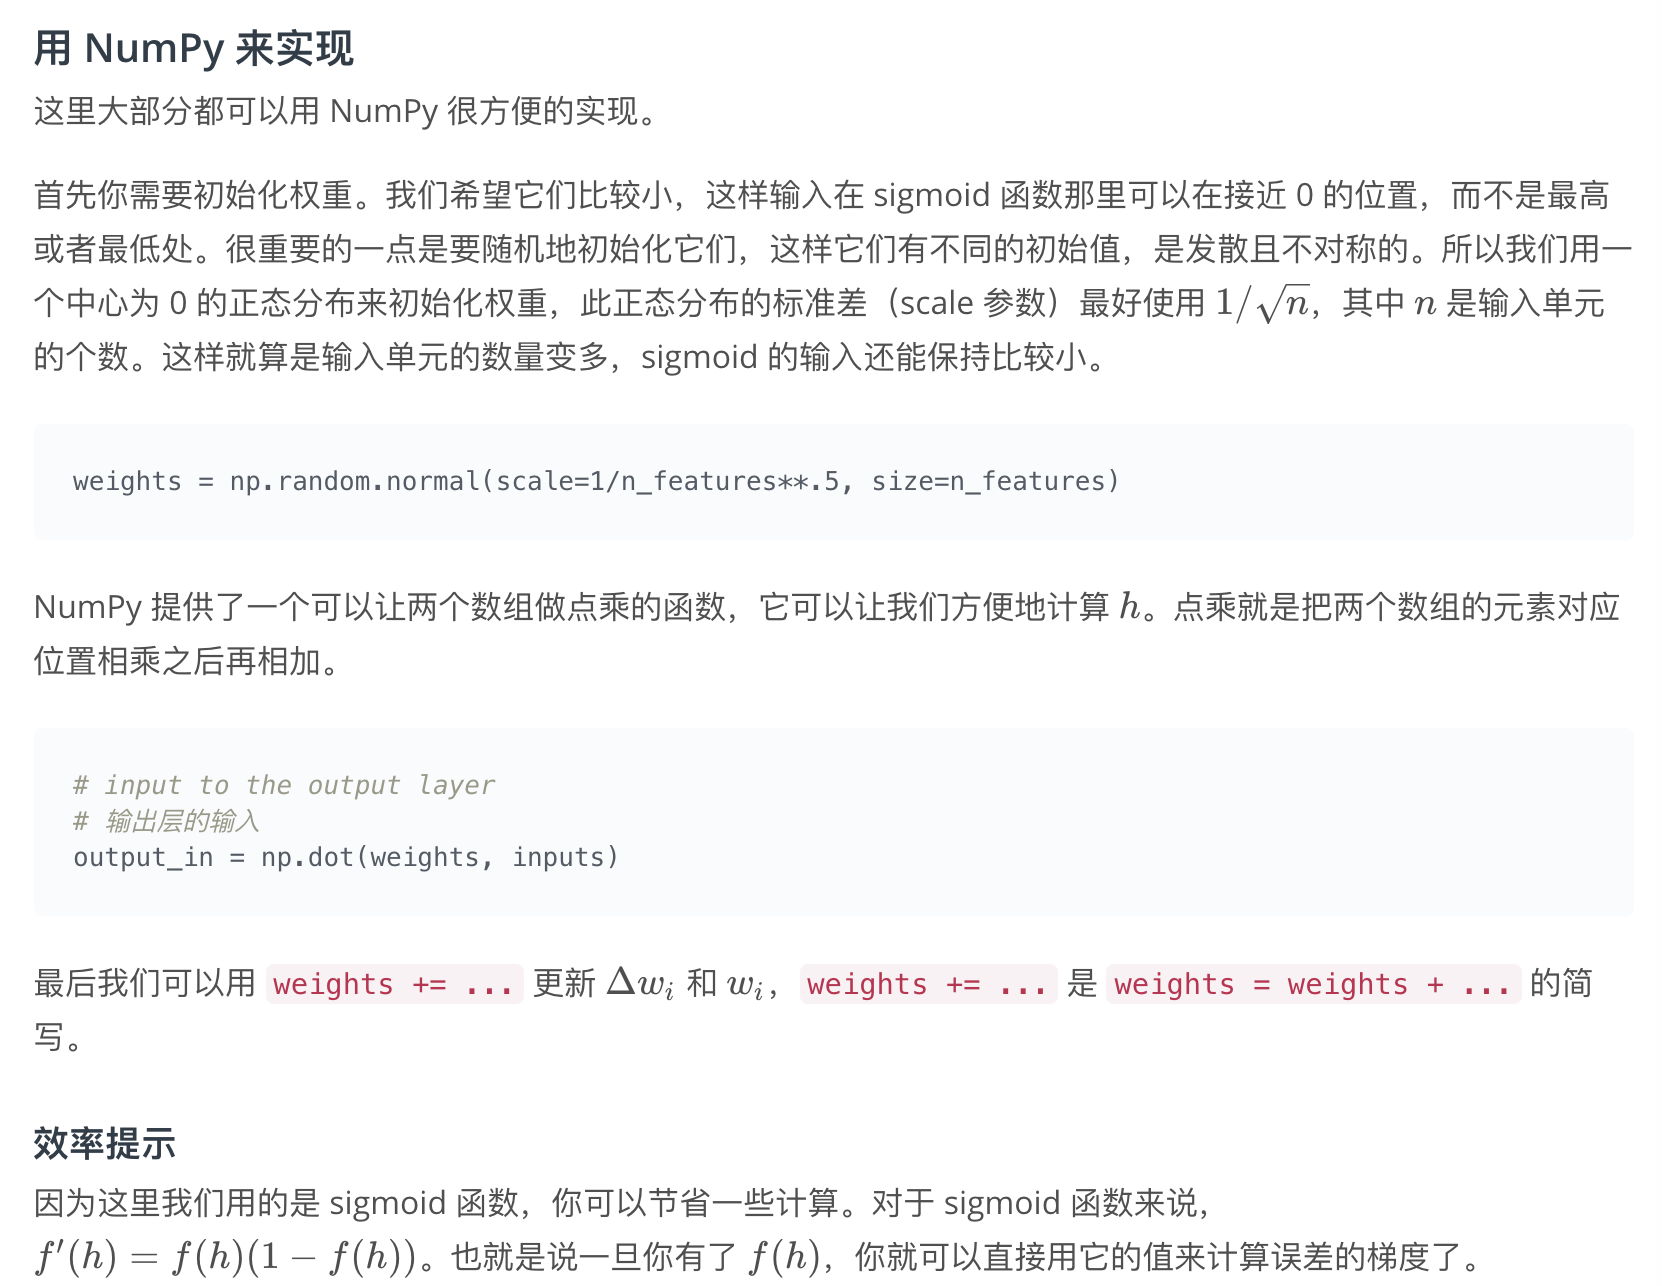

In [11]:
import numpy as np
import pandas as pd

admissions = pd.read_csv('binary.csv')

# Make dummy variables for rank
data = pd.concat([admissions, pd.get_dummies(admissions['rank'], prefix='rank')], axis=1)
data = data.drop('rank', axis=1)

# Standarize features
for field in ['gre', 'gpa']:
    mean, std = data[field].mean(), data[field].std()
    data.loc[:,field] = (data[field]-mean)/std
    
# Split off random 10% of the data for testing
np.random.seed(42)
sample = np.random.choice(data.index, size=int(len(data)*0.9), replace=False)
data, test_data = data.ix[sample], data.drop(sample)

# Split into features and targets
features, targets = data.drop('admit', axis=1), data['admit']
features_test, targets_test = test_data.drop('admit', axis=1), test_data['admit']

/home/mj/.conda/envs/ten/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [12]:
features_test.head()

,gre,gpa,rank_1,rank_2,rank_3,rank_4
20,-0.759199,-0.577822,0,0,1,0
21,0.625884,0.630901,0,1,0,0
48,-1.278605,-2.390908,0,0,0,1
50,0.452749,1.235263,0,0,1,0
54,0.625884,-0.131120,0,0,1,0


In [14]:
import numpy as np

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))

# TODO: We haven't provided the sigmoid_prime function like we did in
#       the previous lesson to encourage you to come up with a more
#       efficient solution. If you need a hint, check out the comments
#       in solution.py from the previous lecture.

# Use to same seed to make debugging easier
np.random.seed(42)

n_records, n_features = features.shape
last_loss = None

# Initialize weights
weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

# Neural Network hyperparameters
epochs = 1000
learnrate = 0.5

for e in range(epochs):
    del_w = np.zeros(weights.shape)
    for x, y in zip(features.values, targets):
        # Loop through all records, x is the input, y is the target

        # Note: We haven't included the h variable from the previous
        #       lesson. You can add it if you want, or you can calculate
        #       the h together with the output

        # TODO: Calculate the output
        output = sigmoid(np.dot(x,weights))

        # TODO: Calculate the error
        error = y - output

        # TODO: Calculate the error term
        error_term = error * output *(1-output)

        # TODO: Calculate the change in weights for this sample
        #       and add it to the total weight change
        #   error_term*x
        del_w += error_term * x 

    # TODO: Update weights using the learning rate and the average change in weights
    weights += learnrate * del_w / n_records

    # Printing out the mean square error on the training set
    if e % (epochs / 10) == 0:
        out = sigmoid(np.dot(features, weights))
        loss = np.mean((out - targets) ** 2)
        if last_loss and last_loss < loss:
            print("Train loss: ", loss, "  WARNING - Loss Increasing")
        else:
            print("Train loss: ", loss)
        last_loss = loss


# Calculate accuracy on test data
tes_out = sigmoid(np.dot(features_test, weights))
predictions = tes_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Train loss:  0.26276093849966364
Train loss:  0.20928619409324895
Train loss:  0.20084292908073417
Train loss:  0.1986215647552789
Train loss:  0.19779851396686018
Train loss:  0.19742577912189863
Train loss:  0.19723507746241065
Train loss:  0.19712945625092465
Train loss:  0.19706766341315077
Train loss:  0.19703005801777368
Prediction accuracy: 0.725
